In [129]:
#we import pandas library to manipulate data
import pandas as pd

#we load datasets and print the head to see how they look like
cash_request_df = pd.read_csv('extract - cash request - data analyst.csv')
fees_df = pd.read_csv('extract-fees-mav.csv')

display(cash_request_df.head())
display(fees_df.head())
#We can see that are columns with the same name but different meaning, so if we want to merge everything, we have to change columns names accordingly


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [130]:
#by looking at the data, looks like we have one dataframe with users and cash requests and then another dataframe with the corresponding fee, let's look at first example:
cash_request_df[cash_request_df['id'] == 14941.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
9954,14941,100.0,direct_debit_rejected,2020-09-07 10:46:57.780263+00,2020-12-20 22:40:42.540135+00,35661.0,NaN,NaN,2020-10-01 22:00:00+00,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00


In [131]:
#to differenciate if the columns refers to the CR or fhe fee we change column names of orignal datasets
# Rename repeated columns in cash_request_df
cash_request_df.rename(columns=lambda x: f"CR_{x}", inplace=True)
# Rename repeated columns in fees_df
fees_df.rename(columns=lambda x: f"F_{x}", inplace=True)

display(cash_request_df.head())
display(fees_df.head())

,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,CR_cash_request_received_date,CR_money_back_date,CR_transfer_type,CR_send_at,CR_recovery_status,CR_reco_creation,CR_reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,F_id,F_cash_request_id,F_type,F_status,F_category,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [132]:
#let's also change the name of F_cash_request_id to CR_id so they have the same column name in both dataset as it is the same unique values
fees_df.rename(columns={'F_cash_request_id': 'CR_id'}, inplace=True)

In [133]:
#we are going to merge them now but before merging let's print dimensions of dataset to check later that merging makes sense
print(cash_request_df.shape)
print(fees_df.shape)

(23970, 16)
(21061, 13)


In [134]:
#now let's merge so we have all cash requests and their fees
merged_df = pd.merge(left = cash_request_df, right = fees_df, left_on = 'CR_id', right_on = 'CR_id', how = 'left') #we will loose fees not associated to any CR, will study them separately

print(merged_df.shape)
merged_df.sample(10)


(32094, 28)


,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,CR_cash_request_received_date,...,F_status,F_category,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment
27454,23081,50.0,money_back,2020-10-22 13:37:47.58782+00,2020-12-18 13:12:35.98495+00,86805.0,NaN,NaN,2020-11-09 23:00:00+00,2020-10-23,...,accepted,NaN,5.0,Instant Payment Cash Request 23081,2020-10-22 13:38:54.30637+00,2020-10-22 13:38:54.306394+00,2020-11-10 20:02:24.685+00,NaN,NaN,after
18997,18586,100.0,money_back,2020-09-30 15:34:56.767919+00,2020-12-18 13:10:21.184951+00,29897.0,NaN,NaN,2020-10-26 22:00:00+00,2020-10-02,...,accepted,NaN,5.0,Instant Payment Cash Request 18586,2020-09-30 15:35:15.136259+00,2020-10-13 14:25:11.809832+00,2020-10-26 23:28:57.121919+00,NaN,NaN,after
25616,23563,25.0,money_back,2020-10-23 15:59:54.846378+00,2020-12-18 13:12:02.86212+00,51003.0,NaN,NaN,2020-11-07 16:59:51.904+00,2020-10-24,...,accepted,NaN,5.0,Instant Payment Cash Request 23563,2020-10-23 16:00:33.097036+00,2020-10-23 16:00:33.097057+00,2020-11-07 19:47:48.568153+00,NaN,NaN,after
25511,21676,100.0,money_back,2020-10-16 18:31:03.087471+00,2020-12-18 13:12:01.2637+00,69424.0,NaN,NaN,2020-11-29 11:00:00+00,2020-10-20,...,accepted,NaN,5.0,Postpone Cash Request 21676,2020-10-26 12:33:14.59694+00,2020-10-26 12:33:19.531096+00,2020-10-26 12:33:18.791589+00,2020-10-30 11:00:00+00,2020-11-29 11:00:00+00,before
15496,6899,20.0,money_back,2020-07-07 12:29:12.097464+00,2020-12-18 13:09:28.259831+00,14230.0,2020-07-07 15:25:06.551835+00,NaN,2020-07-14 22:00:00+00,2020-07-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11976,17449,100.0,money_back,2020-09-23 11:19:45.380151+00,2021-01-28 16:13:34.478911+00,47387.0,2020-09-23 12:05:11.064324+00,NaN,2021-01-31 11:00:00+00,2020-09-25,...,accepted,NaN,5.0,Instant Payment Cash Request 17449,2020-09-23 12:05:12.500544+00,2020-10-13 14:25:13.326282+00,2021-01-28 16:13:34.506992+00,NaN,NaN,after
1581,2007,100.0,money_back,2020-05-19 03:56:47.141319+00,2020-06-13 11:43:44.73471+00,5175.0,2020-05-20 08:15:27.809576+00,NaN,2020-06-13 22:00:00+00,2020-05-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6853,15326,100.0,rejected,2020-09-09 11:33:25.802186+00,2020-09-09 12:22:28.414262+00,38754.0,2020-09-09 12:22:28.406355+00,NaN,2020-10-05 10:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24593,20205,100.0,money_back,2020-10-09 18:17:35.371663+00,2020-12-18 13:11:47.932613+00,65959.0,NaN,NaN,2020-10-24 18:17:16.689+00,2020-10-13,...,accepted,NaN,5.0,Instant Payment Cash Request 20205,2020-10-09 22:30:04.310043+00,2020-10-13 14:25:17.950766+00,2020-10-24 15:16:49.18443+00,NaN,NaN,after
31311,21329,100.0,money_back,2020-10-15 14:04:43.089564+00,2020-12-18 13:15:21.400307+00,73277.0,NaN,NaN,2020-11-25 11:00:00+00,2020-10-16,...,rejected,NaN,5.0,Instant Payment Cash Request 21329,2020-10-15 14:05:19.578513+00,2020-10-15 14:05:19.578555+00,2020-12-02 04:34:03.615813+00,NaN,NaN,after


In [135]:
#this makes sense? we have that the length of merged is greater thatn the length of cash requests, which means we have charque requests ids with more than one fee? could we have some null values?
merged_df.isnull().sum()

CR_id                                0
CR_amount                            0
CR_status                            0
CR_created_at                        0
CR_updated_at                        0
CR_user_id                        2572
CR_moderated_at                  10335
CR_deleted_account_id            29521
CR_reimbursement_date                0
CR_cash_request_received_date     7945
CR_money_back_date                8177
CR_transfer_type                     0
CR_send_at                        9416
CR_recovery_status               24894
CR_reco_creation                 24894
CR_reco_last_update              24894
F_id                             11037
F_type                           11037
F_status                         11037
F_category                       29898
F_total_amount                   11037
F_reason                         11037
F_created_at                     11037
F_updated_at                     11037
F_paid_at                        16563
F_from_date              

In [136]:
#looks like there are charge requests with no fees which makes sense, but let's check if the size of the merged_df is justified by checking if a cash request could have more than one fee
CR_multiple_fees = merged_df.groupby('CR_id')['F_id'].nunique().reset_index()
CR_multiple_fees.sample(10)

,CR_id,F_id
973,1047,0
10151,12240,2
7703,9541,11
8627,10587,0
20762,23528,1
10540,12655,4
3315,3583,0
7993,9876,0
1277,1359,0
16356,18876,2


In [137]:
#for now we dont want to clean any data because the meaning of NaN makes sense in the colums, depending on the info we wanna get.

<center>
  <h1><b>METRICS TO ANALYZE</b></h1>
</center>

<span style="font-size:22px;">Frequency of Service Usage</span>

In [138]:
#We need to group data by userid, userdid and then count the number of cash requests over a period: daily, monthly and yearly. But first, we need to convert created_at column to datetime
merged_df['CR_created_at'] = pd.to_datetime(merged_df['CR_created_at'])

In [139]:
#lets create a new column called CR_creation_date to get just the date and ease filtering later
merged_df['CR_creation_date'] = merged_df['CR_created_at'].dt.date


In [140]:
#We group per creation date and then we count the number of CR_id. Here it does no matter if we use count or nunique because CR with same ID are created in the same date
daily_service_usage = merged_df.groupby(['CR_creation_date'])['CR_id'].count().reset_index()
daily_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(daily_service_usage.head())
display(daily_service_usage.describe())

#From describe function we can check that on average around 97 CR are received per day. A typical value of CR per day sould be 38 and for some reasons some days we can have high CR demand.

,CR_creation_date,CR_id_count
0,2019-11-19,1
1,2019-12-09,1
2,2019-12-10,18
3,2019-12-11,22
4,2019-12-12,25


,CR_id_count
count,330.000000
mean,97.254545
std,115.399038
min,1.000000
25%,9.000000
50%,38.000000
75%,165.250000
max,694.000000


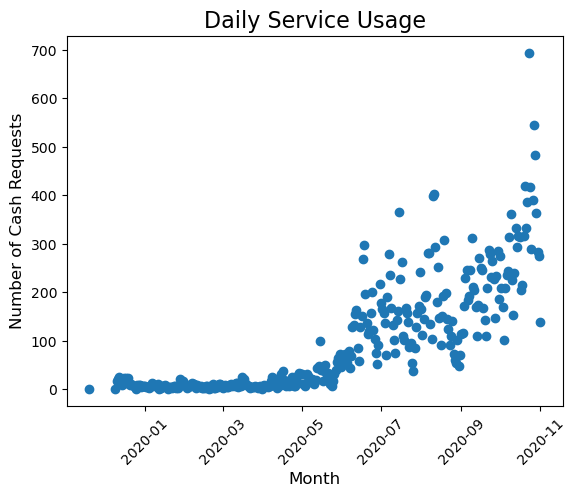

In [141]:
#We know plot the data in scatter format to check what the tendency could be

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(daily_service_usage['CR_creation_date'],daily_service_usage['CR_id_count'])
plt.title("Daily Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.show()

#Looks like the shape is a bit exponential! 

In [142]:
#now we create another extra column for the month, we will filter by month later

merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')
monthly_service_usage = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()    #here is important not repeating same CR_id
monthly_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(monthly_service_usage.head())
display(monthly_service_usage.describe())

#From the printed data we can see some outliers that we will consider to clean data later

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\2167455607.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_id_count
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244


,CR_id_count
count,13.000000
mean,1843.846154
std,2344.271914
min,1.000000
25%,223.000000
50%,473.000000
75%,3417.000000
max,7725.000000


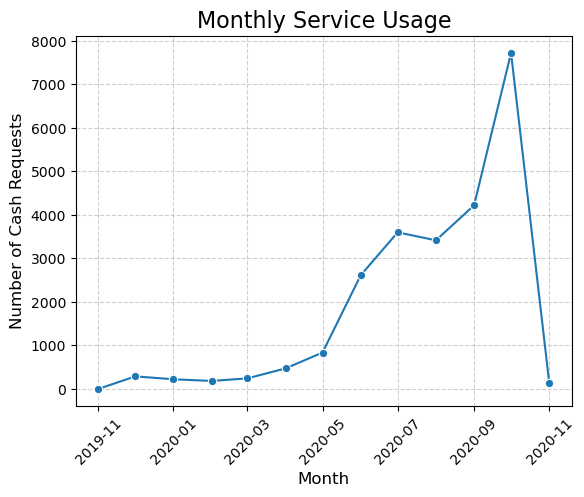

In [143]:
#Now we plot the data per month

import matplotlib.pyplot as plt
import seaborn as sns

#we change the datatype so we can represent it on x axis
monthly_service_usage['CR_creation_month'] = monthly_service_usage['CR_creation_month'].dt.to_timestamp()

sns.lineplot(data=monthly_service_usage, x='CR_creation_month', y='CR_id_count', marker='o')
plt.title("Monthly Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [144]:
#maybe the data set is not showing complete data records so we will get rid of first and last month of the records.

merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')
monthly_service_usage = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()    #here is important not repeating same CR_id
monthly_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
first_month = monthly_service_usage['CR_creation_month'].min()
last_month = monthly_service_usage['CR_creation_month'].max()

filtered_monthly_service_usage = monthly_service_usage[
    (monthly_service_usage['CR_creation_month'] > first_month) &
    (monthly_service_usage['CR_creation_month'] < last_month)
]

display(filtered_monthly_service_usage.head())
display(filtered_monthly_service_usage.describe())



C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\236380544.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_id_count
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473


,CR_id_count
count,11.000000
mean,2166.272727
std,2418.772585
min,184.000000
25%,266.500000
50%,837.000000
75%,3509.000000
max,7725.000000


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\439382129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_service_usage['CR_creation_month'] = filtered_monthly_service_usage['CR_creation_month'].dt.to_timestamp()


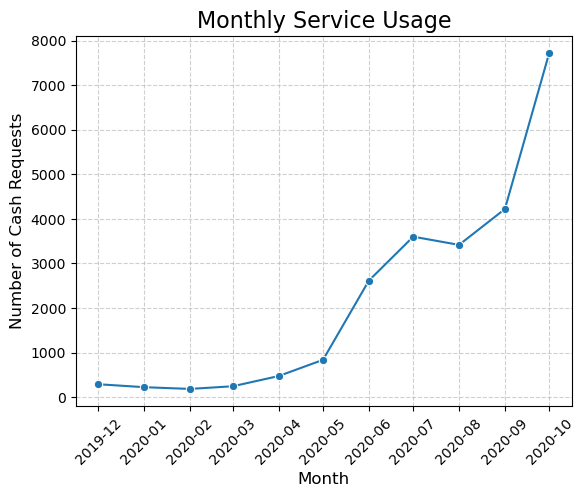

In [145]:
#Now we plot the data per month again

import matplotlib.pyplot as plt
import seaborn as sns

#we change the datatype so we can represent it on x axis
filtered_monthly_service_usage['CR_creation_month'] = filtered_monthly_service_usage['CR_creation_month'].dt.to_timestamp()

sns.lineplot(data=filtered_monthly_service_usage, x='CR_creation_month', y='CR_id_count', marker='o')
plt.title("Monthly Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\1800866948.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_copy['CR_user_id'].fillna(merged_df_copy['CR_deleted_account_id'], inplace=True)
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\1800866948.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df_copy['CR_creation_month'] = merged_df_copy['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_user_id,CR_usage_count
0,2019-11,47.0,1
1,2019-12,35.0,2
2,2019-12,47.0,1
3,2019-12,52.0,1
4,2019-12,53.0,1
5,2019-12,68.0,1
6,2019-12,77.0,1
7,2019-12,83.0,1
8,2019-12,90.0,1
9,2019-12,91.0,1


,CR_creation_month,Average_CR_usage_per_user
0,2019-11,1.000000
1,2019-12,1.133333
2,2020-01,1.137755
3,2020-02,1.082353
4,2020-03,1.134884
5,2020-04,1.123515
6,2020-05,1.146575
7,2020-06,1.244645
8,2020-07,1.328292
9,2020-08,1.314736


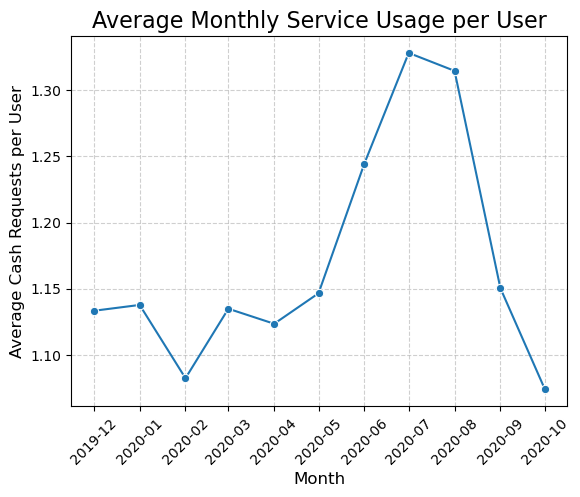

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# we create a copy so we can fill null data depending on the question we want to answer so we do not modify original merged dataset
merged_df_copy = merged_df.copy()

# In this case, we are going to consider users
merged_df_copy['CR_user_id'].fillna(merged_df_copy['CR_deleted_account_id'], inplace=True)

# again we create a colum with creation month 
merged_df_copy['CR_creation_month'] = merged_df_copy['CR_created_at'].dt.to_period('M')

# now we group to calculate use frequency per user and per month
service_usage_by_user = merged_df_copy.groupby(['CR_creation_month', 'CR_user_id'])['CR_id'].nunique().reset_index()
service_usage_by_user.rename(columns={'CR_id': 'CR_usage_count'}, inplace=True)
display(service_usage_by_user.head(10))

# based on previous grouping, we can now calculate mean usage per user per month
average_service_usage = service_usage_by_user.groupby('CR_creation_month')['CR_usage_count'].mean().reset_index()
average_service_usage.rename(columns={'CR_usage_count': 'Average_CR_usage_per_user'}, inplace=True)

display(average_service_usage.head(10))

# again, we change datatime objet to be able to display on X axis
average_service_usage['CR_creation_month'] = average_service_usage['CR_creation_month'].dt.to_timestamp()

# We get rid of first and last month again
first_month = average_service_usage['CR_creation_month'].min()
last_month = average_service_usage['CR_creation_month'].max()

filtered_average_service_usage = average_service_usage[
    (average_service_usage['CR_creation_month'] > first_month) &
    (average_service_usage['CR_creation_month'] < last_month)
]

# Paso 8: Representar el promedio en un gráfico de líneas
sns.lineplot(data=filtered_average_service_usage, x='CR_creation_month', y='Average_CR_usage_per_user', marker='o')
plt.title("Average Monthly Service Usage per User", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Cash Requests per User", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()



<span style="font-size:22px;">Incident Rate</span>

,month,Count,Incident_type
0,2020-10,48,Declined_transactions


,month,Count,Incident_type
0,2019-12,24,Failed_direct_debit
1,2020-01,9,Failed_direct_debit
2,2020-02,10,Failed_direct_debit
3,2020-03,3,Failed_direct_debit
4,2020-04,14,Failed_direct_debit


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\4242295148.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\4242295148.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')


,month,Count,Incident_type
0,2019-12,110,Rejected_CR
1,2020-01,112,Rejected_CR
2,2020-02,72,Rejected_CR
3,2020-03,75,Rejected_CR
4,2020-04,150,Rejected_CR


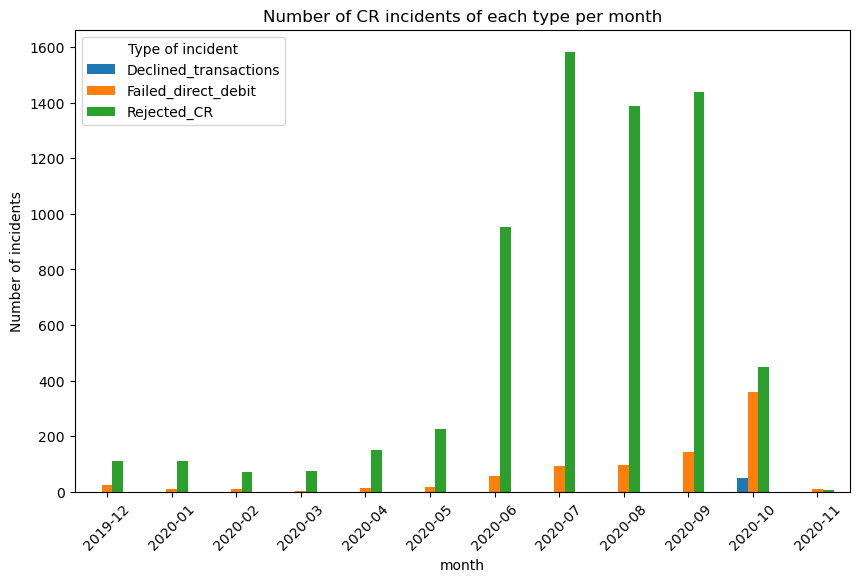

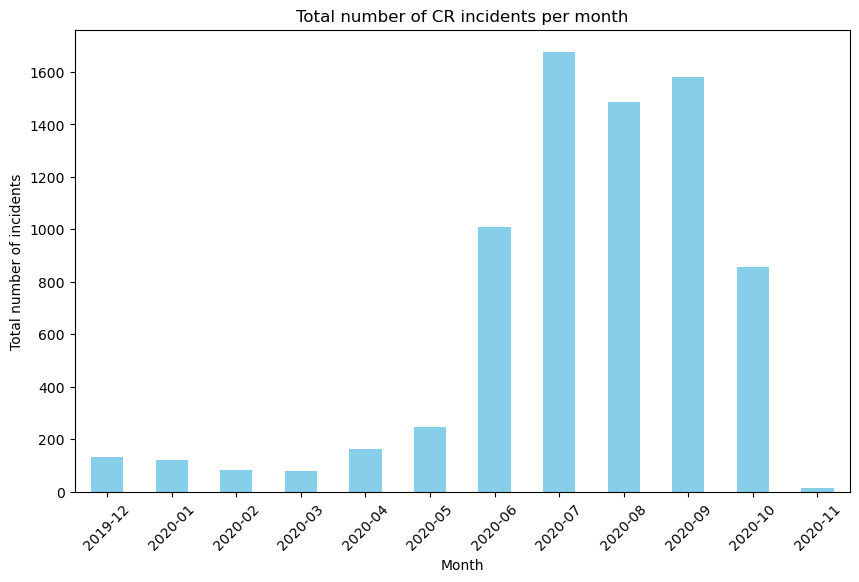

In [147]:
#CR incident rate

#lets define datasets with possible incidents in payments (cash requests or fees payments)

declined_transactions = merged_df[(merged_df['CR_status']=='transaction_declined')] #failed to send funds to the customer, the fee could confirmed, accepted or cancelled thought
#display(declined_transactions['F_status'].unique())


failed_direct_debit = merged_df[(merged_df['CR_status']=='direct_debit_rejected')] #failed to charge the customer, the fee could be confirmed, accepted or cancelled 
#display(declined_transactions['F_status'].unique())

failed_rejected_CRs = merged_df[(merged_df['CR_status']=='rejected')] #failed to charge the fee, cash request could be active, direct debit rejected, direct debit sent, money back or canceled
#display(failed_fee_charges['CR_status'].unique())

#lets calculate the declined transaction rate and also to plot it for each month 

declined_transactions_rate = declined_transactions.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
declined_transactions_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
declined_transactions_rate['Incident_type'] = 'Declined_transactions'
display(declined_transactions_rate.head())

failed_direct_debit_rate = failed_direct_debit.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
failed_direct_debit_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
failed_direct_debit_rate['Incident_type'] = 'Failed_direct_debit'
display(failed_direct_debit_rate.head())


#we change the datatype so we can represent it on x axis

#lets create a new column called CR_creation_date to get just the date and ease filtering later
failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
rejected_CR_rate = failed_rejected_CRs.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
rejected_CR_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
rejected_CR_rate['Incident_type'] = 'Rejected_CR'
display(rejected_CR_rate.head())

incidents_per_month = pd.concat([declined_transactions_rate,failed_direct_debit_rate, rejected_CR_rate])
incidents_per_month = incidents_per_month.sort_values(by='month')

# Número de incidentes por mes para cada tipo de incidente
pivot_table = incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Count', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Number of CR incidents of each type per month')
plt.xlabel('month')
plt.ylabel('Number of incidents')
plt.legend(title='Type of incident')
plt.xticks(rotation=45)
plt.show()

# Número total de incidentes por mes
df_monthly_totals = incidents_per_month.groupby('month')['Count'].sum()
df_monthly_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total number of CR incidents per month')
plt.xlabel('Month')
plt.ylabel('Total number of incidents')
plt.xticks(rotation=45)
plt.show()






C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\1995986664.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\1995986664.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')


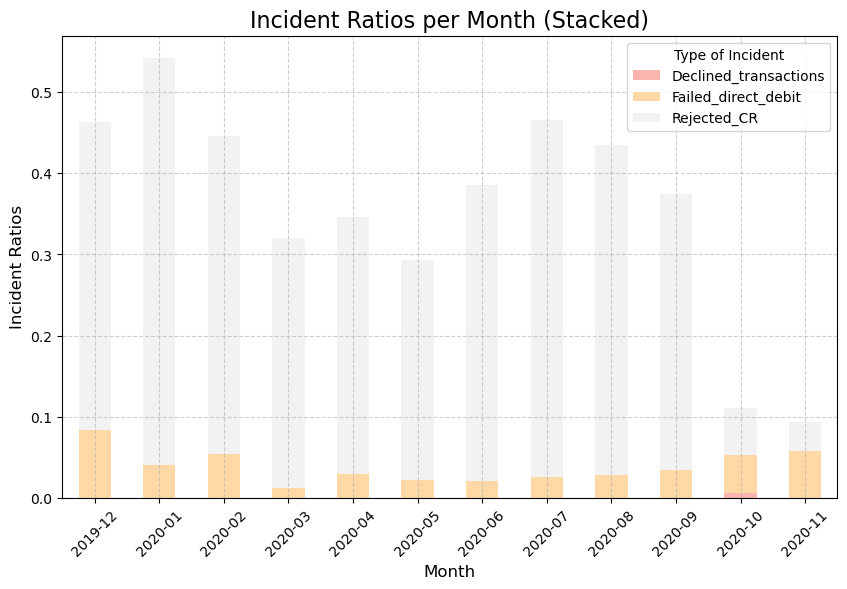

In [148]:
# total CR per month
total_cr_per_month = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
total_cr_per_month.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Total_CR_count'}, inplace=True)


# Declined Transactions
declined_transactions_rate = declined_transactions.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
declined_transactions_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
declined_transactions_rate = pd.merge(declined_transactions_rate, total_cr_per_month, on='month')
declined_transactions_rate['Incident_ratio'] = declined_transactions_rate['Count'] / declined_transactions_rate['Total_CR_count']
declined_transactions_rate['Incident_type'] = 'Declined_transactions'

# Failed Direct Debit
failed_direct_debit_rate = failed_direct_debit.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
failed_direct_debit_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
failed_direct_debit_rate = pd.merge(failed_direct_debit_rate, total_cr_per_month, on='month')
failed_direct_debit_rate['Incident_ratio'] = failed_direct_debit_rate['Count'] / failed_direct_debit_rate['Total_CR_count']
failed_direct_debit_rate['Incident_type'] = 'Failed_direct_debit'

# Rejected CRs
failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
rejected_CR_rate = failed_rejected_CRs.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
rejected_CR_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
rejected_CR_rate = pd.merge(rejected_CR_rate, total_cr_per_month, on='month')
rejected_CR_rate['Incident_ratio'] = rejected_CR_rate['Count'] / rejected_CR_rate['Total_CR_count']
rejected_CR_rate['Incident_type'] = 'Rejected_CR'

# Concatenate all df
incidents_per_month = pd.concat([declined_transactions_rate, failed_direct_debit_rate, rejected_CR_rate])

pivot_table_ratios = incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Pile graph
pivot_table_ratios.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Pastel1')
plt.title('Incident Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type of Incident')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\3689595335.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')


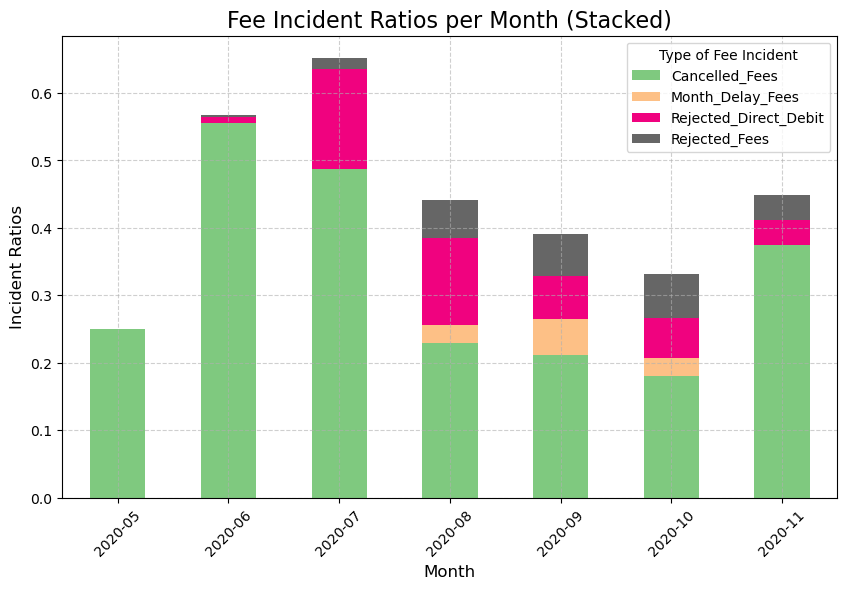

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's remove rows where F_created_at is null
filtered_fees_df = merged_df.copy() #[merged_df['F_created_at'].isnull()]

filtered_fees_df['F_created_at'] = pd.to_datetime(filtered_fees_df['F_created_at'], errors = 'coerce')

# Create month column for fees too
filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')

# Calculate number of fees per month
total_fees_per_month = filtered_fees_df.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
total_fees_per_month.rename(columns={'F_creation_month': 'month', 'F_id': 'Total_Fees_count'}, inplace=True)

# Analyze incident by status 
# Rejected Fees
rejected_fees = filtered_fees_df[filtered_fees_df['F_status'] == 'rejected']
rejected_fees_rate = rejected_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_fees_rate = pd.merge(rejected_fees_rate, total_fees_per_month, on='month')
rejected_fees_rate['Incident_ratio'] = rejected_fees_rate['Count'] / rejected_fees_rate['Total_Fees_count']
rejected_fees_rate['Incident_type'] = 'Rejected_Fees'

# Cancelled Fees
cancelled_fees = filtered_fees_df[filtered_fees_df['F_status'] == 'cancelled']
cancelled_fees_rate = cancelled_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
cancelled_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
cancelled_fees_rate = pd.merge(cancelled_fees_rate, total_fees_per_month, on='month')
cancelled_fees_rate['Incident_ratio'] = cancelled_fees_rate['Count'] / cancelled_fees_rate['Total_Fees_count']
cancelled_fees_rate['Incident_type'] = 'Cancelled_Fees'

# Analyze for category too
# Category: rejected_direct_debit
rejected_direct_debit = filtered_fees_df[filtered_fees_df['F_category'] == 'rejected_direct_debit']
rejected_direct_debit_rate = rejected_direct_debit.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_direct_debit_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_direct_debit_rate = pd.merge(rejected_direct_debit_rate, total_fees_per_month, on='month')
rejected_direct_debit_rate['Incident_ratio'] = rejected_direct_debit_rate['Count'] / rejected_direct_debit_rate['Total_Fees_count']
rejected_direct_debit_rate['Incident_type'] = 'Rejected_Direct_Debit'

# Category: month_delay_on_payment
month_delay_fees = filtered_fees_df[filtered_fees_df['F_category'] == 'month_delay_on_payment']
month_delay_fees_rate = month_delay_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
month_delay_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
month_delay_fees_rate = pd.merge(month_delay_fees_rate, total_fees_per_month, on='month')
month_delay_fees_rate['Incident_ratio'] = month_delay_fees_rate['Count'] / month_delay_fees_rate['Total_Fees_count']
month_delay_fees_rate['Incident_type'] = 'Month_Delay_Fees'

# Combine all in one dataframe
fees_incidents_per_month = pd.concat([rejected_fees_rate, cancelled_fees_rate, rejected_direct_debit_rate, month_delay_fees_rate])

# Pivoting for ratios
pivot_table_fees_ratios = fees_incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Step 8: Plot stacked bar chart for fee incidents
pivot_table_fees_ratios.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Accent')
plt.title('Fee Incident Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type of Fee Incident', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\3230135380.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')


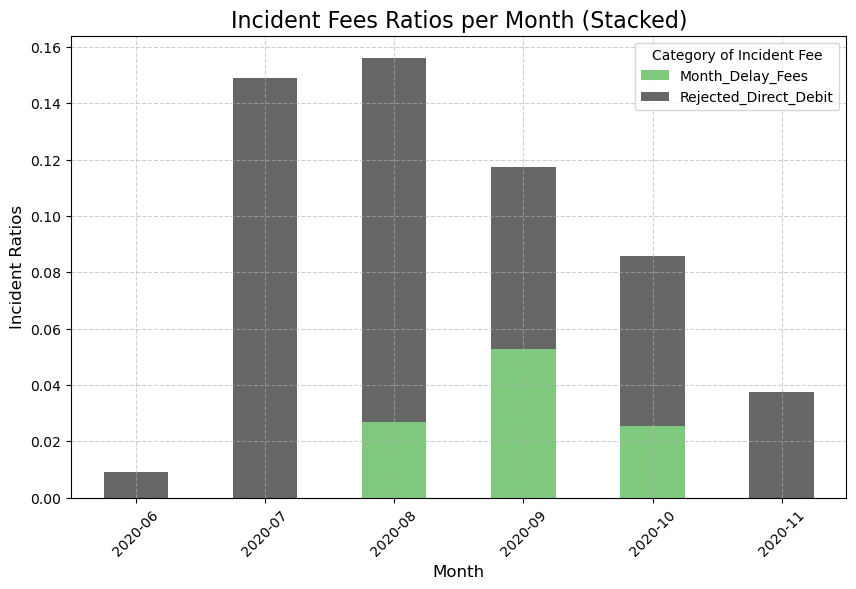

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Eliminar filas con F_created_at nulo y crear F_creation_month
filtered_fees_df = merged_df.copy()
filtered_fees_df['F_created_at'] = pd.to_datetime(filtered_fees_df['F_created_at'])
filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')

# Paso 2: Calcular el total de tarifas creadas por mes
total_fees_per_month = filtered_fees_df.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
total_fees_per_month.rename(columns={'F_creation_month': 'month', 'F_id': 'Total_Fees_count'}, inplace=True)

# Paso 3: Filtrar tarifas de tipo "incident"
incident_fees = filtered_fees_df[filtered_fees_df['F_type'] == 'incident']

# Categoría: rejected_direct_debit
rejected_direct_debit_fees = incident_fees[incident_fees['F_category'] == 'rejected_direct_debit']
rejected_direct_debit_rate = rejected_direct_debit_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_direct_debit_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_direct_debit_rate = pd.merge(rejected_direct_debit_rate, total_fees_per_month, on='month')
rejected_direct_debit_rate['Incident_ratio'] = rejected_direct_debit_rate['Count'] / rejected_direct_debit_rate['Total_Fees_count']
rejected_direct_debit_rate['Incident_type'] = 'Rejected_Direct_Debit'

# Categoría: month_delay_on_payment
month_delay_fees = incident_fees[incident_fees['F_category'] == 'month_delay_on_payment']
month_delay_fees_rate = month_delay_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
month_delay_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
month_delay_fees_rate = pd.merge(month_delay_fees_rate, total_fees_per_month, on='month')
month_delay_fees_rate['Incident_ratio'] = month_delay_fees_rate['Count'] / month_delay_fees_rate['Total_Fees_count']
month_delay_fees_rate['Incident_type'] = 'Month_Delay_Fees'

# Combinar ambas categorías
incident_categories_per_month = pd.concat([rejected_direct_debit_rate, month_delay_fees_rate])

# Crear tabla pivote para los ratios
pivot_table_incident_categories = incident_categories_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Gráfico apilado para mostrar ambas categorías dentro de "incident"
pivot_table_incident_categories.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Accent')
plt.title('Incident Fees Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category of Incident Fee', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




<span style="font-size:22px;">Revenue</span>

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\922129154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data_f['F_created_at'] = pd.to_datetime(revenue_data_f['F_created_at'])
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\922129154.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  revenue_data_f['F_creation_month'] = revenue_data_f['F_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_39484\922129154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,F_creation_month,F_total_amount
0,2020-05,60.0
1,2020-06,1700.0
2,2020-07,4020.0
3,2020-08,10900.0
4,2020-09,16540.0
5,2020-10,40210.0
6,2020-11,780.0


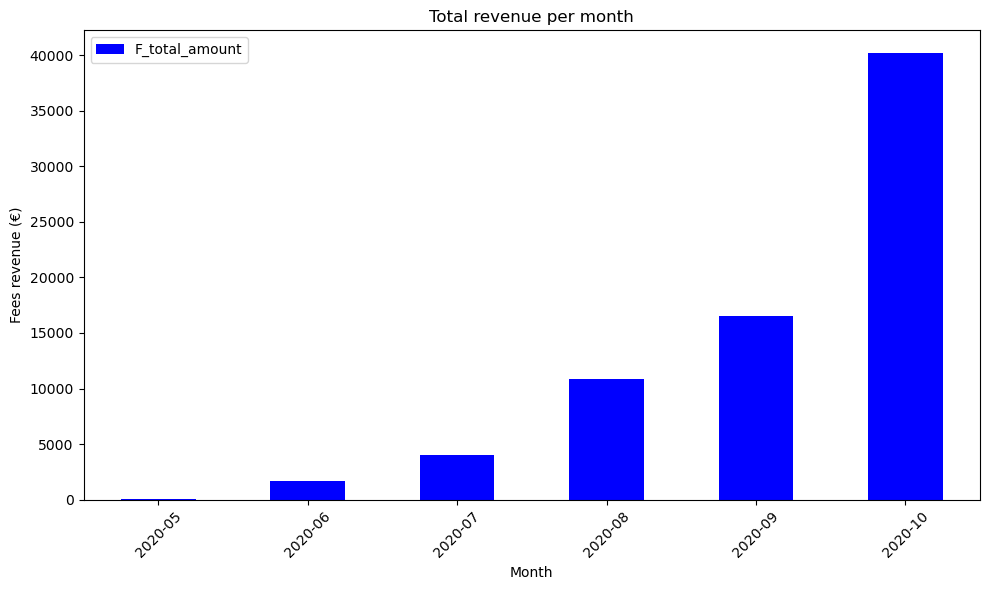

In [154]:
revenue_data = merged_df.copy()

revenue_data_f = revenue_data[revenue_data['F_status']=='accepted']

revenue_data_f['F_created_at'] = pd.to_datetime(revenue_data_f['F_created_at'])
revenue_data_f['F_creation_month'] = revenue_data_f['F_created_at'].dt.to_period('M')

revenue_per_month = revenue_data_f.groupby('F_creation_month').agg({'F_total_amount':'sum'}).reset_index()

display(revenue_per_month)

revenue_per_month = revenue_per_month.iloc[:-1]  #we remove last row cause last month could be incomplete

# Plot with proper x-axis labels
revenue_per_month.plot(
    x='F_creation_month',  # Specify the column for the x-axis
    y='F_total_amount',  # Specify the column for the y-axis
    kind='bar', 
    figsize=(10, 6), 
    color='blue'
)
plt.title('Total revenue per month')
plt.xlabel('Month')
plt.ylabel('Fees revenue (€)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

